Forma de los filtros: kernel_size=91, num_channels=22, depth_multiplier=1


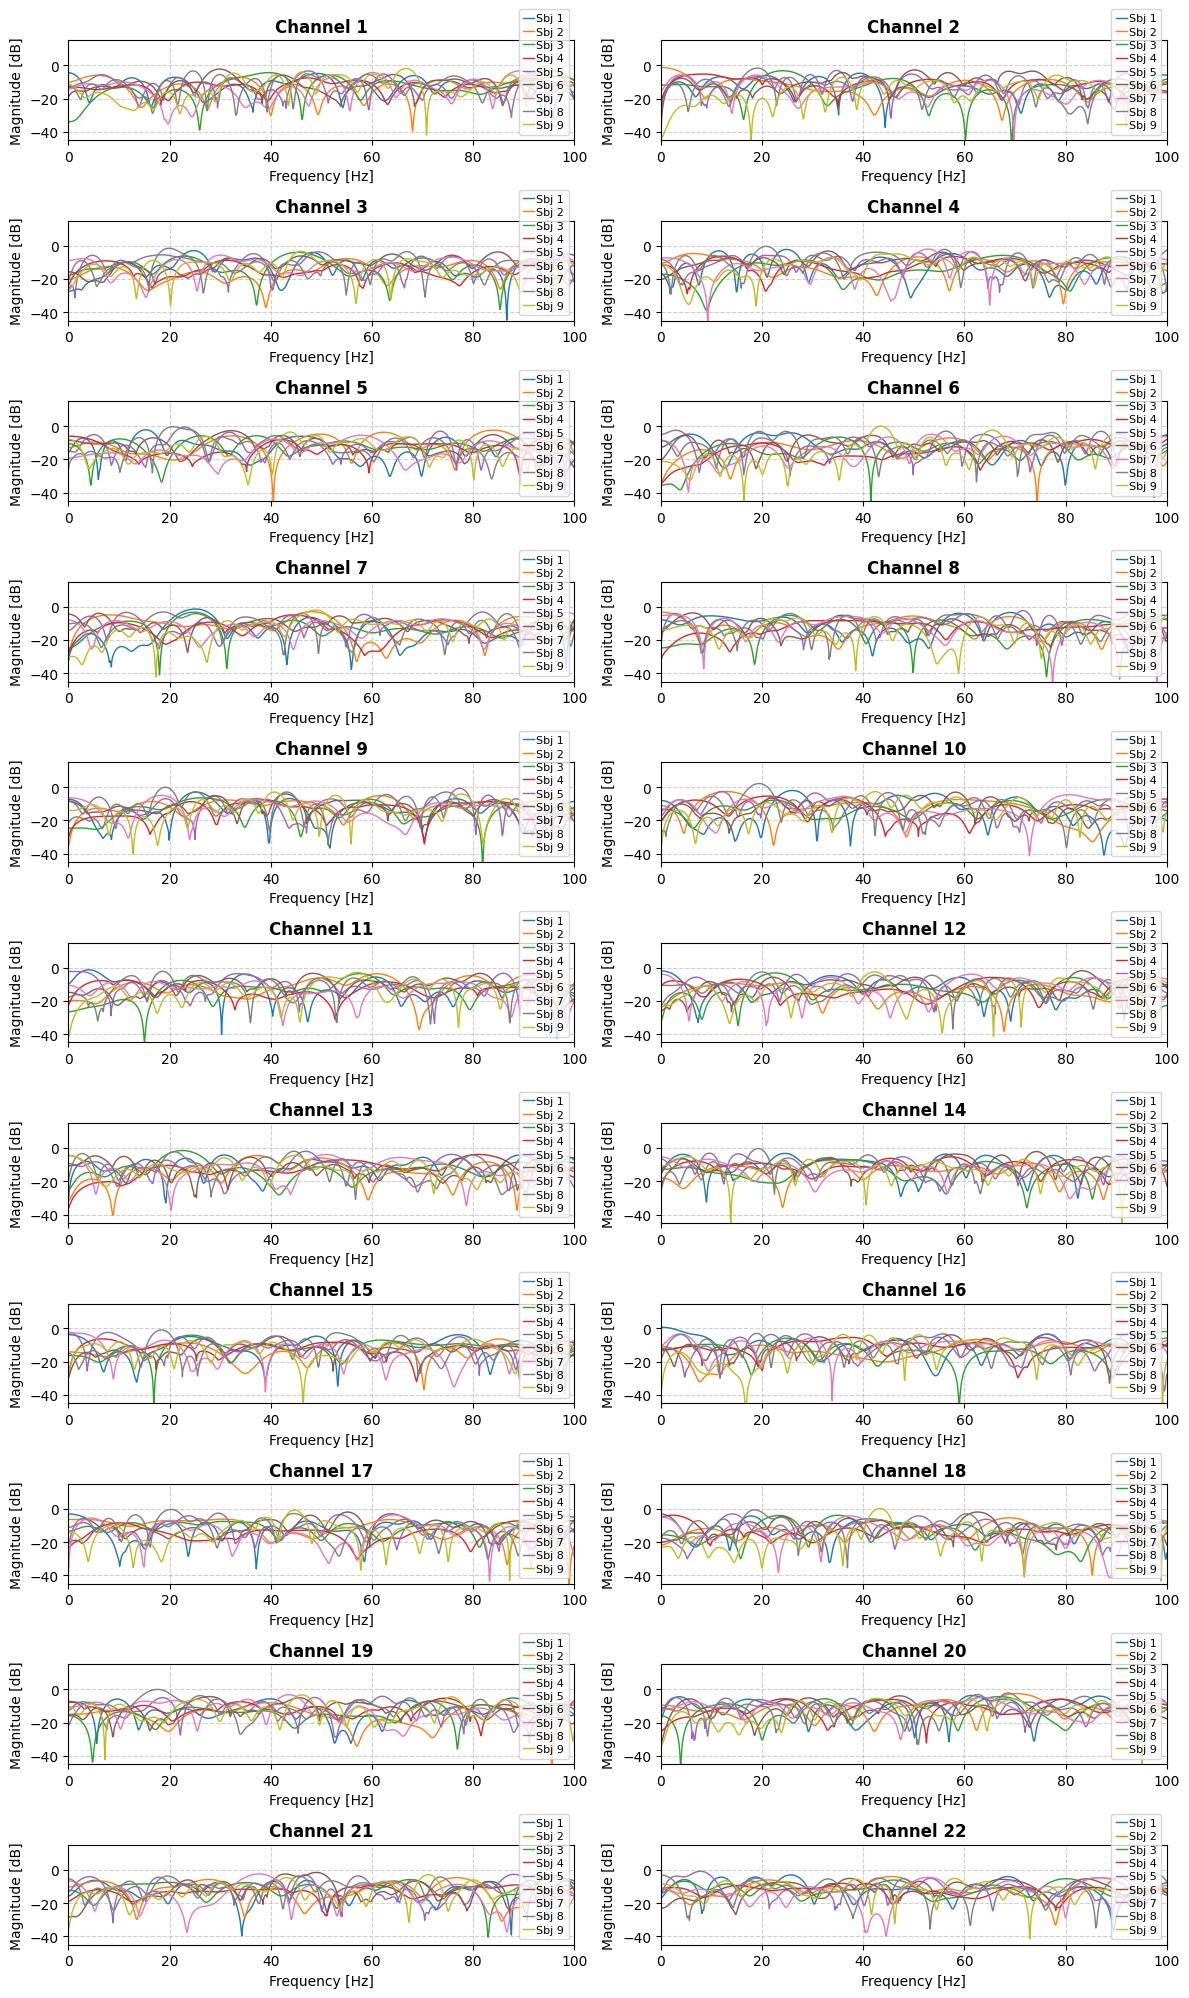

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

def plot_freq_response_by_channel(subject_ids, folds, fs=500, f_max=100):
    """
    Para cada sujeto (en subject_ids) y cada fold (en folds), carga los archivos de pesos 
    (se asume que se llaman 'depthwise_weights_sbj{subject}_fold{fold}.npy').
    Para cada canal (se asume que todos los archivos tienen la misma forma: 
    (kernel_size, num_channels, depth_multiplier)) se calcula la respuesta en frecuencia 
    (usando el primer depth_multiplier) y se promedia entre folds.
    
    Luego se genera una gráfica por canal (22 en total) en la que se plotea la respuesta en 
    frecuencia de cada sujeto.
    """
    ruta_base = "/kaggle/input/filters-depthwise/"
    
    sample_file = f"{ruta_base}depthwise_weights_sbj{subject_ids[0]}_fold{folds[0]}.npy"
    sample_weights = np.load(sample_file)
    kernel_size, num_channels, depth_multiplier = sample_weights.shape
    print(f"Forma de los filtros: kernel_size={kernel_size}, num_channels={num_channels}, depth_multiplier={depth_multiplier}")

  
    responses_by_subject = {}

    for subject in subject_ids:
       
        subject_channel_responses = {ch: [] for ch in range(num_channels)}
        
        for fold in folds:
            filename = f"{ruta_base}depthwise_weights_sbj{subject}_fold{fold}.npy"
            weights = np.load(filename)
            
            for ch in range(num_channels):
                
                filtro = weights[:, ch, 0]
                
                w, h = freqz(filtro, worN=8000, fs=fs)  
                
                mask = w <= f_max
                w_filtered = w[mask]
                h_filtered = h[mask]
              
                h_db = 20 * np.log10(np.abs(h_filtered))
                subject_channel_responses[ch].append(h_db)
        
        
        subject_avg_responses = {}
        for ch in range(num_channels):
            responses_array = np.array(subject_channel_responses[ch])  # forma: (num_folds, len(w_filtered))
            avg_response = responses_array.mean(axis=0)
            subject_avg_responses[ch] = avg_response
        
        
        responses_by_subject[subject] = {
            'w': w_filtered,
            'responses': subject_avg_responses
        }

    
    fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(12, 20))
    axes = axes.flatten()
    
    
    for ch in range(num_channels):
        ax = axes[ch]
       
        for subject in subject_ids:
            w_filtered = responses_by_subject[subject]['w']
            resp = responses_by_subject[subject]['responses'][ch]
            ax.plot(w_filtered, resp, linewidth=1, label=f"Sbj {subject}")
        
        ax.set_title(f'Channel {ch+1}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Frequency [Hz]', fontsize=10)
        ax.set_ylabel('Magnitude [dB]', fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.set_xlim([0, f_max])
        ax.set_ylim([-45, 15])
       
        ax.legend(loc='lower right', prop={'size': 8}, handlelength=1, handletextpad=0.2, labelspacing=0.3)
    
    plt.tight_layout()
    plt.savefig("respuesta_frecuencia_por_canal.pdf", format="pdf", bbox_inches="tight")
    plt.show()



subject_ids = list(range(1, 10))  
folds = list(range(1, 6))          

plot_freq_response_by_channel(subject_ids, folds)

Sujeto 8 - kernel_size=123, num_channels=22, depth_multiplier=1


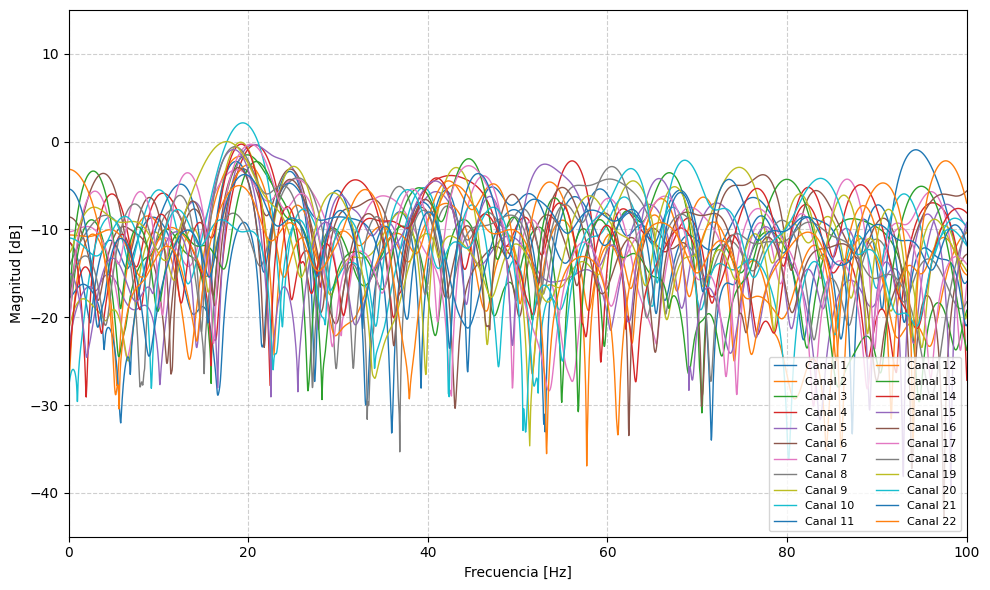

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

def plot_freq_response_single_subject(subject_id, folds, fs=500, f_max=100):
    """
    Carga los filtros del sujeto dado en múltiples folds, promedia la respuesta en frecuencia
    por canal, y dibuja todas las respuestas en una sola gráfica (una curva por canal).
    """
    ruta_base = "/kaggle/input/filters-depthwise/"
    
    # Cargar ejemplo para forma
    sample_file = f"{ruta_base}depthwise_weights_sbj{subject_id}_fold{folds[0]}.npy"
    sample_weights = np.load(sample_file)
    kernel_size, num_channels, depth_multiplier = sample_weights.shape
    print(f"Sujeto {subject_id} - kernel_size={kernel_size}, num_channels={num_channels}, depth_multiplier={depth_multiplier}")

    # Diccionario para acumular respuestas por canal
    channel_responses = {ch: [] for ch in range(num_channels)}

    for fold in folds:
        filename = f"{ruta_base}depthwise_weights_sbj{subject_id}_fold{fold}.npy"
        weights = np.load(filename)
        
        for ch in range(num_channels):
            filtro = weights[:, ch, 0]
            w, h = freqz(filtro, worN=8000, fs=fs)
            mask = w <= f_max
            w_filtered = w[mask]
            h_filtered = h[mask]
            h_db = 20 * np.log10(np.abs(h_filtered))
            channel_responses[ch].append(h_db)

    # Promedio por canal
    avg_responses = {}
    for ch in range(num_channels):
        avg_responses[ch] = np.mean(channel_responses[ch], axis=0)

    # Plot general
    plt.figure(figsize=(10, 6))
    for ch in range(num_channels):
        plt.plot(w_filtered, avg_responses[ch], label=f'Canal {ch+1}', linewidth=1)

    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud [dB]')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim([0, f_max])
    plt.ylim([-45, 15])
    plt.legend(loc='lower right', ncol=2, fontsize=8)
    plt.tight_layout()
    plt.savefig(f"respuesta_frecuencia_sujeto{subject_id}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

# Ejecutar solo para sujeto 8
plot_freq_response_single_subject(subject_id=8, folds=list(range(1, 6)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

def plot_freq_response_by_channel(subject_ids, folds, fs=500, f_max=100):
    """
    Para cada sujeto (en subject_ids) y cada fold (en folds), carga los archivos de pesos 
    (se asume que se llaman 'depthwise_weights_sbj{subject}_fold{fold}.npy').
    Para cada canal (se asume que todos los archivos tienen la misma forma: 
    (kernel_size, num_channels, depth_multiplier)) se calcula la respuesta en frecuencia 
    (usando el primer depth_multiplier) y se promedia entre folds.
    
    Luego se genera una gráfica por canal (22 en total) en la que se plotea la respuesta en 
    frecuencia de cada sujeto.
    """

    subject_accuracies = {
        1: 92.2,
        2: 64.29,
        3: 82.75,
        4: 71.90,
        5: 66.71,
        6: 65.1,
        7: 84.00,
        8: 78.68,
        9: 75.67
    }
    
   
    sorted_subject_ids = sorted(subject_ids, key=lambda s: subject_accuracies[s], reverse=True)
    print("Orden de sujetos por accuracy (mayor a menor):", sorted_subject_ids)
    
    
    sample_file = f"depthwise_weights_sbj{subject_ids[0]}_fold{folds[0]}.npy"
    sample_weights = np.load(sample_file)
    kernel_size, num_channels, depth_multiplier = sample_weights.shape
    print(f"Forma de los filtros: kernel_size={kernel_size}, num_channels={num_channels}, depth_multiplier={depth_multiplier}")

    
    responses_by_subject = {}

    for subject in subject_ids:
        
        subject_channel_responses = {ch: [] for ch in range(num_channels)}
        
        for fold in folds:
            filename = f"depthwise_weights_sbj{subject}_fold{fold}.npy"
            weights = np.load(filename)
            
            for ch in range(num_channels):
                
                filtro = weights[:, ch, 0]
                
                w, h = freqz(filtro, worN=8000, fs=fs)  
             
                mask = w <= f_max
                w_filtered = w[mask]
                h_filtered = h[mask]
               
                h_db = 20 * np.log10(np.abs(h_filtered))
                subject_channel_responses[ch].append(h_db)
        
       
        subject_avg_responses = {}
        for ch in range(num_channels):
            responses_array = np.array(subject_channel_responses[ch])  # forma: (num_folds, len(w_filtered))
            avg_response = responses_array.mean(axis=0)
            subject_avg_responses[ch] = avg_response
        
        
        responses_by_subject[subject] = {
            'w': w_filtered,
            'responses': subject_avg_responses
        }

    
    
    fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(12, 20))
    axes = axes.flatten()
    
    
    cmap = plt.cm.Blues
    #cmap = plt.cm.Greys_r
    n_subjects = len(sorted_subject_ids)
    
   
    for ch in range(num_channels):
        ax = axes[ch]
        
        for i, subject in enumerate(sorted_subject_ids):
           
            color = cmap(i / (n_subjects - 1)) if n_subjects > 1 else cmap(0.5)
            w_filtered = responses_by_subject[subject]['w']
            resp = responses_by_subject[subject]['responses'][ch]
            ax.plot(w_filtered, resp, linewidth=1, color=color, label=f"Sbj {subject}")
        
        ax.set_title(f'Channel {ch+1}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Frequency [Hz]', fontsize=10)
        ax.set_ylabel('Magnitude [dB]', fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.set_xlim([0, f_max])
        ax.set_ylim([-45, 15])
        ax.legend(loc='lower right', prop={'size': 8}, handlelength=1, handletextpad=0.2, labelspacing=0.3)
    
    plt.tight_layout()
    plt.savefig("respuesta_frecuencia_por_canal.pdf", format="pdf", bbox_inches="tight")
    plt.show()


subject_ids = list(range(1, 10))  # Sujeto 1 al 9
folds = list(range(1, 6))          # Folds 1 al 5

plot_freq_response_by_channel(subject_ids, folds)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
import pandas as pd

def plot_freq_response_by_channel(subject_ids, folds, fs=500, f_max=100):
    """
    Para cada sujeto (en subject_ids) y cada fold (en folds), carga los archivos de pesos 
    (se asume que se llaman 'depthwise_weights_sbj{subject}_fold{fold}.npy').
    Para cada canal (se asume que todos los archivos tienen la misma forma: 
    (kernel_size, num_channels, depth_multiplier)) se calcula la respuesta en frecuencia 
    (usando el primer depth_multiplier) y se promedia entre folds.
    
    Luego se genera una gráfica por canal (22 en total) en la que se plotea la respuesta en 
    frecuencia de cada sujeto.
    
    Retorna:
        responses_by_subject: diccionario con la respuesta promedio por canal para cada sujeto.
        num_channels: número total de canales.
    """
    # Diccionario de accuracies (para ordenar los sujetos)
    subject_accuracies = {
        1: 94.9,
        2: 88.8,
        3: 92.5,
        4: 87.7,
        5: 91.1,
        6: 75.3,
        7: 79.5,
        8: 79.2,
        9: 71.1
    }

    
    # Ordenar los sujetos de mayor a menor accuracy
    sorted_subject_ids = sorted(subject_ids, key=lambda s: subject_accuracies[s], reverse=True)
    print("Orden de sujetos por accuracy (mayor a menor):", sorted_subject_ids)
    
    # Cargar un archivo de ejemplo para extraer la forma de los filtros
    sample_file = f"depthwise_weights_sbj{subject_ids[0]}_fold{folds[0]}.npy"
    sample_weights = np.load(sample_file)
    kernel_size, num_channels, depth_multiplier = sample_weights.shape
    print(f"Forma de los filtros: kernel_size={kernel_size}, num_channels={num_channels}, depth_multiplier={depth_multiplier}")

    # Diccionario para almacenar las respuestas por sujeto
    responses_by_subject = {}

    # Para cada sujeto, calcular la respuesta promedio por canal a partir de los folds
    for subject in subject_ids:
        subject_channel_responses = {ch: [] for ch in range(num_channels)}
        
        for fold in folds:
            filename = f"depthwise_weights_sbj{subject}_fold{fold}.npy"
            weights = np.load(filename)
            
            for ch in range(num_channels):
                # Tomar el primer depth_multiplier para el canal
                filtro = weights[:, ch, 0]
                
                # Calcular la respuesta en frecuencia
                w, h = freqz(filtro, worN=8000, fs=fs)
                mask = w <= f_max
                w_filtered = w[mask]
                h_filtered = h[mask]
                
                h_db = 20 * np.log10(np.abs(h_filtered))
                subject_channel_responses[ch].append(h_db)
        
        # Promediar la respuesta en frecuencia para cada canal entre los folds
        subject_avg_responses = {}
        for ch in range(num_channels):
            responses_array = np.array(subject_channel_responses[ch])  # (num_folds, len(w_filtered))
            avg_response = responses_array.mean(axis=0)
            subject_avg_responses[ch] = avg_response
        
        responses_by_subject[subject] = {
            'w': w_filtered,
            'responses': subject_avg_responses
        }
    
    # Ploteo: una gráfica por canal (distribuidas en una grilla de 11 x 2)
    fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(12, 20))
    axes = axes.flatten()
    
    cmap = plt.cm.Blues  # Puedes cambiar el cmap si lo deseas
    n_subjects = len(sorted_subject_ids)
    
    for ch in range(num_channels):
        ax = axes[ch]
        for i, subject in enumerate(sorted_subject_ids):
            color = cmap(i / (n_subjects - 1)) if n_subjects > 1 else cmap(0.5)
            w_filtered = responses_by_subject[subject]['w']
            resp = responses_by_subject[subject]['responses'][ch]
            ax.plot(w_filtered, resp, linewidth=1, color=color, label=f"Sbj {subject}")
        
        ax.set_title(f'Channel {ch+1}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Frequency [Hz]', fontsize=10)
        ax.set_ylabel('Magnitude [dB]', fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.set_xlim([0, f_max])
        ax.set_ylim([-45, 15])
        ax.legend(loc='lower right', prop={'size': 8}, handlelength=1, handletextpad=0.2, labelspacing=0.3)
    
    plt.tight_layout()
    plt.savefig("respuesta_frecuencia_por_canal.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
    return responses_by_subject, num_channels

# Definir los sujetos y folds
subject_ids = list(range(1, 10))  # Sujetos 1 a 9
folds = list(range(1, 6))          # Folds 1 a 5

# Calcular las respuestas en frecuencia y obtener el diccionario y el número de canales
responses_by_subject, num_channels = plot_freq_response_by_channel(subject_ids, folds, fs=500, f_max=100)

# Construir la tabla para exportar a Excel:
# Se asume que todas las respuestas usan el mismo vector de frecuencias; usamos el del primer sujeto.
example_subject = subject_ids[0]
freqs = responses_by_subject[example_subject]['w']

rows = []
for subject in subject_ids:
    subject_data = responses_by_subject[subject]
    for ch in range(num_channels):
        response = subject_data['responses'][ch]
        # Crear una fila: sujeto, canal y las magnitudes para cada frecuencia.
        row = {"Subject": subject, "Channel": ch + 1}  # Etiquetamos canales de 1 a num_channels
        for i, freq in enumerate(freqs):
            # Se crea una columna para cada frecuencia formateada (por ejemplo, 'Freq_10.00Hz')
            row[f"Freq_{freq:.2f}Hz"] = response[i]
        rows.append(row)

# Convertir la lista de filas en un DataFrame de pandas
df_responses = pd.DataFrame(rows)

# Exportar a Excel (archivo "frequency_responses.xlsx")
df_responses.to_excel("frequency_responses.xlsx", index=False)
print("La tabla con las respuestas en frecuencia se ha exportado a 'frequency_responses.xlsx'.")


Orden de sujetos por accuracy (mayor a menor): [1, 3, 5, 2, 4, 7, 8, 6, 9]


FileNotFoundError: [Errno 2] No such file or directory: 'depthwise_weights_sbj1_fold1.npy'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
import pandas as pd

def plot_freq_response_by_channel(subject_ids, folds, fs=500, f_max=100):
    """
    Para cada sujeto (en subject_ids) y cada fold (en folds), carga los archivos de pesos 
    (se asume que se llaman 'depthwise_weights_sbj{subject}_fold{fold}.npy').
    Para cada canal (se asume que todos los archivos tienen la misma forma: 
    (kernel_size, num_channels, depth_multiplier)) se calcula la respuesta en frecuencia 
    (usando el primer depth_multiplier) y se promedia entre folds.
    
    Luego se genera una gráfica por canal (22 en total) en la que se plotea la respuesta en 
    frecuencia de cada sujeto.
    
    Retorna:
        responses_by_subject: diccionario con la respuesta promedio por canal para cada sujeto.
        num_channels: número total de canales.
    """
    # Diccionario de accuracies (para ordenar los sujetos)
    subject_accuracies = {
        1: 94.9,
        2: 88.8,
        3: 92.5,
        4: 87.7,
        5: 91.1,
        6: 75.3,
        7: 79.5,
        8: 79.2,
        9: 71.1
    }

    # Ordenar los sujetos de mayor a menor accuracy
    sorted_subject_ids = sorted(subject_ids, key=lambda s: subject_accuracies[s], reverse=True)
    print("Orden de sujetos por accuracy (mayor a menor):", sorted_subject_ids)
    
    # Cargar un archivo de ejemplo para extraer la forma de los filtros
    sample_file = f"depthwise_weights_sbj{subject_ids[0]}_fold{folds[0]}.npy"
    sample_weights = np.load(sample_file)
    kernel_size, num_channels, depth_multiplier = sample_weights.shape
    print(f"Forma de los filtros: kernel_size={kernel_size}, num_channels={num_channels}, depth_multiplier={depth_multiplier}")

    # Diccionario para almacenar las respuestas por sujeto
    responses_by_subject = {}

    # Para cada sujeto, calcular la respuesta promedio por canal a partir de los folds
    for subject in subject_ids:
        subject_channel_responses = {ch: [] for ch in range(num_channels)}
        
        for fold in folds:
            filename = f"depthwise_weights_sbj{subject}_fold{fold}.npy"
            weights = np.load(filename)
            
            for ch in range(num_channels):
                # Tomar el primer depth_multiplier para el canal
                filtro = weights[:, ch, 0]
                
                # Calcular la respuesta en frecuencia
                w, h = freqz(filtro, worN=8000, fs=fs)
                mask = w <= f_max
                w_filtered = w[mask]
                h_filtered = h[mask]
                
                h_db = 20 * np.log10(np.abs(h_filtered))
                subject_channel_responses[ch].append(h_db)
        
        # Promediar la respuesta en frecuencia para cada canal entre los folds
        subject_avg_responses = {}
        for ch in range(num_channels):
            responses_array = np.array(subject_channel_responses[ch])  # (num_folds, len(w_filtered))
            avg_response = responses_array.mean(axis=0)
            subject_avg_responses[ch] = avg_response
        
        responses_by_subject[subject] = {
            'w': w_filtered,
            'responses': subject_avg_responses
        }
    
    # Ploteo: una gráfica por canal (distribuidas en una grilla de 11 x 2)
    fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(12, 20))
    axes = axes.flatten()
    
    # Usar colores distintos para cada sujeto, utilizando la paleta por defecto de Matplotlib
    # Se obtiene la lista de colores disponibles
    default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    n_default = len(default_colors)
    
    # Si hay más sujetos que colores en la paleta por defecto, se extiende con otra paleta (ej. 'tab20')
    if len(sorted_subject_ids) > n_default:
        colors = plt.cm.tab20(np.linspace(0, 1, len(sorted_subject_ids)))
    else:
        colors = default_colors[:len(sorted_subject_ids)]
    
    for ch in range(num_channels):
        ax = axes[ch]
        for i, subject in enumerate(sorted_subject_ids):
            color = colors[i]
            w_filtered = responses_by_subject[subject]['w']
            resp = responses_by_subject[subject]['responses'][ch]
            ax.plot(w_filtered, resp, linewidth=1, color=color, label=f"Sbj {subject}")
        
        ax.set_title(f'Channel {ch+1}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Frequency [Hz]', fontsize=10)
        ax.set_ylabel('Magnitude [dB]', fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.set_xlim([0, f_max])
        ax.set_ylim([-45, 15])
        ax.legend(loc='lower right', prop={'size': 8}, handlelength=1, handletextpad=0.2, labelspacing=0.3)
    
    plt.tight_layout()
    plt.savefig("respuesta_frecuencia_por_canal.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
    return responses_by_subject, num_channels

# Definir los sujetos y folds
subject_ids = list(range(1, 10))  # Sujetos 1 a 9
folds = list(range(1, 6))          # Folds 1 a 5

# Calcular las respuestas en frecuencia y obtener el diccionario y el número de canales
responses_by_subject, num_channels = plot_freq_response_by_channel(subject_ids, folds, fs=500, f_max=100)

# Construir la tabla para exportar a Excel:
# Se asume que todas las respuestas usan el mismo vector de frecuencias; usamos el del primer sujeto.
example_subject = subject_ids[0]
freqs = responses_by_subject[example_subject]['w']

rows = []
for subject in subject_ids:
    subject_data = responses_by_subject[subject]
    for ch in range(num_channels):
        response = subject_data['responses'][ch]
        # Crear una fila: sujeto, canal y las magnitudes para cada frecuencia.
        row = {"Subject": subject, "Channel": ch + 1}  # Etiquetamos canales de 1 a num_channels
        for i, freq in enumerate(freqs):
            # Se crea una columna para cada frecuencia formateada (por ejemplo, 'Freq_10.00Hz')
            row[f"Freq_{freq:.2f}Hz"] = response[i]
        rows.append(row)

# Convertir la lista de filas en un DataFrame de pandas
df_responses = pd.DataFrame(rows)

# Exportar a Excel (archivo "frequency_responses.xlsx")
#df_responses.to_excel("frequency_responses.xlsx", index=False)
#print("La tabla con las respuestas en frecuencia se ha exportado a 'frequency_responses.xlsx'.")
